# `streamline_horses_featurization_jockey.ipynb`

### Author: Anthony Hein

#### Last updated: 11/3/2021

# Overview:

Perform feature engineering on the horses dataset to summarize the past performance of any given horse.

---

## Setup

In [1]:
from datetime import datetime
import git
import os
import re
from typing import List
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `horses_selected_trimmed_clean_augmented.csv`

We will perform calculations with this dataset since it is slimmer, even though we will eventually concatenate our features to the dataset which already contains the features for a horse.

In [3]:
horses_clean = pd.read_csv(f"{BASE_DIR}/data/streamline/horses_selected_trimmed_clean_augmented.csv", low_memory=False) 
horses_clean.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,weight,res_win,res_place,res_show,finishing time,finishing time ratio
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,0,...,NaN,King's Ride,Browne's Return,Deep Run,73,1,1,0,277.200000,1.000000
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,NaN,Long Pond,Courtlough Lady,Giolla Mear,73,0,1,0,278.679948,1.005339
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,NaN,Nordico,Over The Seas,North Summit,71,0,0,0,278.957438,1.006340
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,Roselier,Miss Reindeer,Reindeer,73,0,0,0,284.507242,1.026361
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,Noalto,Elena's Beauty,Tarqogan,66,0,0,0,290.057045,1.046382


In [4]:
horses_clean.shape

(202304, 24)

---

## Load `horses_featurized_horse.csv`

We need to join any new features to this.

In [5]:
horses_featurized_horse = pd.read_csv(f"{BASE_DIR}/data/streamline/horses_featurized_horse.csv", low_memory=False) 
horses_featurized_horse.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,prev_3_position_rain,prev_1_finishing_time_ratio_rain,prev_2_finishing_time_ratio_rain,prev_3_finishing_time_ratio_rain,prev_1_position_rhum,prev_2_position_rhum,prev_3_position_rhum,prev_1_finishing_time_ratio_rhum,prev_2_finishing_time_ratio_rhum,prev_3_finishing_time_ratio_rhum
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
horses_featurized_horse.shape

(202304, 90)

In [7]:
horses_featurized_horse_jockey = horses_featurized_horse.copy()
horses_featurized_horse_jockey.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,prev_3_position_rain,prev_1_finishing_time_ratio_rain,prev_2_finishing_time_ratio_rain,prev_3_finishing_time_ratio_rain,prev_1_position_rhum,prev_2_position_rhum,prev_3_position_rhum,prev_1_finishing_time_ratio_rhum,prev_2_finishing_time_ratio_rhum,prev_3_finishing_time_ratio_rhum
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

## Load `races_featurized.csv`

In [8]:
races_featurized = pd.read_csv(f"{BASE_DIR}/data/streamline/races_featurized.csv", low_memory=False) 
races_featurized.head()

,rid,course,title,winningTime,metric,ncond,class,runners,margin,1st_place_rank_in_odds,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
0,302858,Thurles,Liffey Maiden Hurdle (Div 1),277.2,3821.0,1,0,6,1.219263,1,...,0,1,0,0,0,0,0,0,1,1.350363
1,291347,Punchestown,Ericsson G.S.M. Grand National Trial Handicap ...,447.2,5229.0,5,0,9,1.218049,4,...,1,0,0,1,0,0,0,0,1,1.995151
2,75447,Listowel,Ballybunion E.B.F. Beginners S'chase,318.4,3620.0,5,0,8,1.277320,3,...,1,0,0,0,0,0,0,1,0,1.786421
3,358038,Punchestown,Quinns Of Baltinglass Chase (La Touche) (Cross...,533.9,6637.0,1,0,10,1.286595,1,...,0,1,0,0,0,0,0,1,0,1.611062
4,89211,Tipperary,Topaz Sprint Stakes (Listed),59.9,1005.0,4,0,5,1.217043,4,...,1,0,0,0,0,0,1,0,0,1.254374


In [9]:
races_featurized.shape

(20201, 129)

In [10]:
races_featurized['datetime'] = pd.to_datetime(races_featurized['datetime'])
races_featurized.head()

,rid,course,title,winningTime,metric,ncond,class,runners,margin,1st_place_rank_in_odds,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
0,302858,Thurles,Liffey Maiden Hurdle (Div 1),277.2,3821.0,1,0,6,1.219263,1,...,0,1,0,0,0,0,0,0,1,1.350363
1,291347,Punchestown,Ericsson G.S.M. Grand National Trial Handicap ...,447.2,5229.0,5,0,9,1.218049,4,...,1,0,0,1,0,0,0,0,1,1.995151
2,75447,Listowel,Ballybunion E.B.F. Beginners S'chase,318.4,3620.0,5,0,8,1.277320,3,...,1,0,0,0,0,0,0,1,0,1.786421
3,358038,Punchestown,Quinns Of Baltinglass Chase (La Touche) (Cross...,533.9,6637.0,1,0,10,1.286595,1,...,0,1,0,0,0,0,0,1,0,1.611062
4,89211,Tipperary,Topaz Sprint Stakes (Listed),59.9,1005.0,4,0,5,1.217043,4,...,1,0,0,0,0,0,1,0,0,1.254374


In [11]:
races_featurized = races_featurized.sort_values(by='datetime')
races_featurized[['datetime']].head(10)

,datetime
320,1990-01-20 14:30:00
321,1990-05-18 17:30:00
322,1990-05-18 18:30:00
323,1990-05-25 17:00:00
324,1990-05-28 18:30:00
325,1990-07-11 17:00:00
326,1990-07-20 18:00:00
328,1990-08-14 17:15:00
327,1990-08-14 18:45:00
329,1990-08-16 17:15:00


---

## Exploring Jockey

In [12]:
horses_clean['jockeyName'].value_counts()

Pat Smullen         8234
Kevin Manning       7434
Wayne Lordan        6855
Declan McDonogh     6731
Seamie Heffernan    6335
                    ... 
Miss E Johansson       1
Mr E Lynch             1
Mr D L Mulcaire        1
D M Somers             1
Mr P J Croke           1
Name: jockeyName, Length: 2660, dtype: int64

In [37]:
horses_clean['jockeyName'].value_counts()[:230]

Pat Smullen         8234
Kevin Manning       7434
Wayne Lordan        6855
Declan McDonogh     6731
Seamie Heffernan    6335
                    ... 
Phillip Enright      103
R M Walsh            102
Jonathan Burke       101
Valdir De Souza      101
Mr H D Dunne         101
Name: jockeyName, Length: 230, dtype: int64

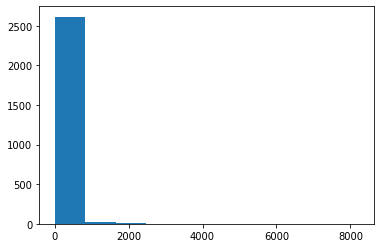

In [14]:
plt.hist(horses_clean['jockeyName'].value_counts())
plt.show()

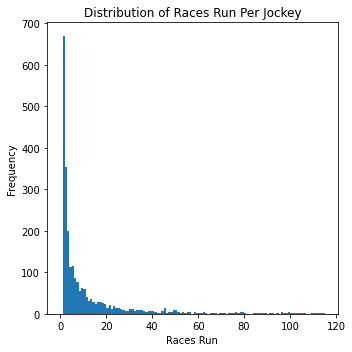

In [29]:
fig = plt.figure(figsize=(5,5))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0:1, 0:1])

ax1.set_title("Distribution of Races Run Per Jockey")
ax1.hist(horses_featurized_horse['jockeyName'].value_counts(), range=(0, 115), bins=115)
ax1.set_xlabel("Races Run")
ax1.set_ylabel("Frequency")

plt.tight_layout()

fig.savefig(f"{BASE_DIR}/figures/jockeys_distribution.png")

plt.show()

In [38]:
np.median([v for k,v in horses_featurized_horse['jockeyName'].value_counts().to_dict().items()])

4.0

In [39]:
np.mean([int(v == 1) for k,v in horses_featurized_horse['jockeyName'].value_counts().to_dict().items()])

0.25150375939849623

In [40]:
np.mean([int(v >= 115) for k,v in horses_featurized_horse['jockeyName'].value_counts().to_dict().items()])

0.07894736842105263

## Map Jockey to All Races

For any given race, we may only featurize it using races that have come before chronologically, else we are giving our model information that it doesn't have available to it.

In [15]:
def get_all_races_with_jockey(jockey_name: str) -> pd.core.frame.DataFrame:
    """
    Get all entries in the horses dataset with a horse of `jockey_name`, and return
    these in sorted order by time that they occured.
    """
    
    df = horses_clean[horses_clean['jockeyName'] == jockey_name]
    df = df.merge(races_featurized, how='left', on='rid')
    return df.sort_values(by='datetime')

In [16]:
sorted_jockey_races = {}

for jockey_name in tqdm(horses_clean['jockeyName'].unique()):
    sorted_jockey_races[jockey_name] = get_all_races_with_jockey(jockey_name)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2660/2660 [01:26<00:00, 30.92it/s]


In [21]:
sorted_jockey_races['Patrick McGrath'][['rid', 'jockeyName', 'datetime']]

,rid,jockeyName,datetime
6,165446,Patrick McGrath,2017-04-29 17:10:00
7,58303,Patrick McGrath,2017-08-13 16:25:00
0,143647,Patrick McGrath,2018-11-03 15:10:00
1,123287,Patrick McGrath,2018-12-01 14:40:00
2,406059,Patrick McGrath,2020-06-24 16:40:00
3,408251,Patrick McGrath,2020-08-05 16:20:00
4,411227,Patrick McGrath,2020-09-29 16:20:00
5,412923,Patrick McGrath,2020-10-26 15:25:00


In [18]:
def get_previous_races_from_df(df: pd.core.frame.DataFrame,
                               rid: int,
                               strict: bool = True) -> pd.core.frame.DataFrame:
    """
    All races that occured prior to the race with `rid` within `df`.
    The argument `strict` means strictly lesser when set to `True`.
    """
    
    rid_datetime = df[df['rid'] == rid].iloc[0]['datetime']

    lo = 0
    hi = len(df) - 1

    while lo <= hi:

        mid = lo + (hi - lo) // 2

        curr_datetime = df.iloc[mid]['datetime']

        if curr_datetime < rid_datetime:
            lo = mid + 1

        elif curr_datetime > rid_datetime:
            hi = mid - 1

        else:
            break

            
    if strict:
        return df.head(mid) if mid > 0 else pd.DataFrame()
    else:
        return df.head(mid + 1)

In [20]:
get_previous_races_from_df(sorted_jockey_races['Patrick McGrath'], 406059)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
6,165446,The Long Hall,6.0,5.0,0.029412,0,John C McConnell,Patrick McGrath,11,42,...,1,0,0,0,0,0,1,0,0,2.283272
7,58303,The Long Hall,6.0,3.0,0.019608,0,John C McConnell,Patrick McGrath,40,30,...,0,1,0,0,0,1,0,0,0,1.648458
0,143647,Light Myles Ahead,6.0,2.0,0.019608,0,Paul Stafford,Patrick McGrath,5,hd,...,1,0,0,0,0,0,0,1,0,1.117898
1,123287,Light Myles Ahead,6.0,3.0,0.014925,0,Paul Stafford,Patrick McGrath,6,3.75,...,1,0,0,0,0,0,0,0,1,1.512884


In [23]:
get_previous_races_from_df(sorted_jockey_races['Patrick McGrath'], 165446)

""


In [24]:
get_previous_races_from_df(sorted_jockey_races['Patrick McGrath'], 165446, strict=False)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,pressure_level_2,pressure_level_3,pressure_level_4,is_raining,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,entropy of odds
6,165446,The Long Hall,6.0,5.0,0.029412,0,John C McConnell,Patrick McGrath,11,42,...,1,0,0,0,0,0,1,0,0,2.283272


---

## Add Features in Loop

The features we will add are (largely inspired by [http://cs230.stanford.edu/projects_winter_2021/reports/70738477.pdf](http://cs230.stanford.edu/projects_winter_2021/reports/70738477.pdf)):


Additionally, define the global finishing time ratio for a jockey in a race to be:

$$(\text{jockey finishing time}) / (\text{the best finishing time on the same distance in races prior to this})$$

_Note that these similar to those features calculated by horse._

* `jockey_d_last_race`: Time since the jockey's last race.
* `jockey_d_first_race`: Time since the jockey's first race.


* `jockey_prev_1_position`: Position in the jockey's most previous race.
* `jockey_prev_2_position`: Position in the jockey's _second_ most previous race.
* `jockey_prev_3_position`: Position in the jockey's _third_ most previous race.


* `jockey_prev_1_finishing_time_ratio`: Finishing time ratio in the jockey's most previous race.
* `jockey_prev_2_finishing_time_ratio`: Finishing time ratio in the jockey's _second_ most previous race.
* `jockey_prev_3_finishing_time_ratio`: Finishing time ratio in the jockey's _third_ most previous race.


* `jockey_prev_1_global_finishing_time_ratio`: Global finishing time ratio in the jockey's most previous race.
* `jockey_prev_2_global_finishing_time_ratio`: Global finishing time ratio in the jockey's _second_ most previous race.
* `jockey_prev_3_global_finishing_time_ratio`: Global finishing time ratio in the jockey's _third_ most previous race.


* `jockey_prev_1_position_course`: Position in the jockey's most previous race on the same course.
* `jockey_prev_2_position_course`: Position in the jockey's _second_ most previous race on the same course.
* `jockey_prev_3_position_course`: Position in the jockey's _third_ most previous race on the same course.


* `jockey_prev_1_finishing_time_ratio_course`: Finishing time ratio in the jockey's most previous race on the same course.
* `jockey_prev_2_finishing_time_ratio_course`: Finishing time ratio in the jockey's _second_ most previous race on the same course.
* `jockey_prev_3_finishing_time_ratio_course`: Finishing time ratio in the jockey's _third_ most previous race on the same course.


* `jockey_prev_1_position_metric`: Position in the jockey's most previous race over the same distance.
* `jockey_prev_2_position_metric`: Position in the jockey's _second_ most previous race over the same distance.
* `jockey_prev_3_position_metric`: Position in the jockey's _third_ most previous race over the same distance.


* `jockey_prev_1_finishing_time_ratio_metric`: Finishing time ratio in the jockey's most previous race over the same distance.
* `jockey_prev_2_finishing_time_ratio_metric`: Finishing time ratio in the jockey's _second_ most previous race over the same distance.
* `jockey_prev_3_finishing_time_ratio_metric`: Finishing time ratio in the jockey's _third_ most previous race over the same distance.


* `jockey_prev_1_position_ncond`: Position in the jockey's most previous race race with the same track condition.
* `jockey_prev_2_position_ncond`: Position in the jockey's _second_ most previous race race with the same track condition.
* `jockey_prev_3_position_ncond`: Position in the jockey's _third_ most previous race race with the same track condition.


* `jockey_prev_1_finishing_time_ratio_ncond`: Finishing time ratio in the jockey's most previous race with the same track condition.
* `jockey_prev_2_finishing_time_ratio_ncond`: Finishing time ratio in the jockey's _second_ most previous race with the same track condition.
* `jockey_prev_3_finishing_time_ratio_ncond`: Finishing time ratio in the jockey's _third_ most previous race with the same track condition.


* `jockey_prev_1_position_runners`: Position in the jockey's most previous race with the same number of runners.
* `jockey_prev_2_position_runners`: Position in the jockey's _second_ most previous race with the same number of runners.
* `jockey_prev_3_position_runners`: Position in the jockey's _third_ most previous race with the same number of runners.


* `jockey_prev_1_finishing_time_ratio_runners`: Finishing time ratio in the jockey's most previous race with the same number of runners.
* `jockey_prev_2_finishing_time_ratio_runners`: Finishing time ratio in the jockey's _second_ most previous race with the same number of runners.
* `jockey_prev_3_finishing_time_ratio_runners`: Finishing time ratio in the jockey's _third_ most previous race with the same number of runners.


* `jockey_prev_1_position_month`: Position in the jockey's most previous race during the same month.
* `jockey_prev_2_position_month`: Position in the jockey's _second_ most previous race during the same month.
* `jockey_prev_3_position_month`: Position in the jockey's _third_ most previous race during the same month.


* `jockey_prev_1_finishing_time_ratio_month`: Finishing time ratio in the jockey's most previous race during the same month.
* `jockey_prev_2_finishing_time_ratio_month`: Finishing time ratio in the jockey's _second_ most previous race during the same month.
* `jockey_prev_3_finishing_time_ratio_month`: Finishing time ratio in the jockey's _third_ most previous race during the same month.


* `jockey_prev_1_position_temp`: Position in the jockey's most previous race of the same (rough) temperature.
* `jockey_prev_2_position_temp`: Position in the jockey's _second_ most previous race of the same (rough) temperature.
* `jockey_prev_3_position_temp`: Position in the jockey's _third_ most previous race of the same (rough) temperature.


* `jockey_prev_1_finishing_time_ratio_temp`: Finishing time ratio in the jockey's most previous race with the same temperature.
* `jockey_prev_2_finishing_time_ratio_temp`: Finishing time ratio in the jockey's _second_ most previous race with the same temperature.
* `jockey_prev_3_finishing_time_ratio_temp`: Finishing time ratio in the jockey's _third_ most previous race with the same temperature.


* `jockey_prev_1_position_msl`: Position in the jockey's most previous race of the same (rough) pressure.
* `jockey_prev_2_position_msl`: Position in the jockey's _second_ most previous race of the same (rough) pressure.
* `jockey_prev_3_position_msl`: Position in the jockey's _third_ most previous race of the same (rough) pressure.


* `jockey_prev_1_finishing_time_ratio_msl`: Finishing time ratio in the jockey's most previous race with the same pressure.
* `jockey_prev_2_finishing_time_ratio_msl`: Finishing time ratio in the jockey's _second_ most previous race with the same pressure.
* `jockey_prev_3_finishing_time_ratio_msl`: Finishing time ratio in the jockey's _third_ most previous race with the same pressure.


* `jockey_prev_1_position_rain`: Position in the jockey's most previous race with the same presence/absence of rain.
* `jockey_prev_2_position_rain`: Position in the jockey's _second_ most previous race with the same presence/absence of rain.
* `jockey_prev_3_position_rain`: Position in the jockey's _third_ most previous race with the same presence/absence of rain.


* `jockey_prev_1_finishing_time_ratio_rain`: Finishing time ratio in the jockey's most previous race with the same rain.
* `jockey_prev_2_finishing_time_ratio_rain`: Finishing time ratio in the jockey's _second_ most previous race with the same rain.
* `jockey_prev_3_finishing_time_ratio_rain`: Finishing time ratio in the jockey's _third_ most previous race with the same rain.


* `jockey_prev_1_position_rhum`: Position in the jockey's most previous race with the same (rough) humidity.
* `jockey_prev_2_position_rhum`: Position in the jockey's _second_ most previous race with the same (rough) humidity.
* `jockey_prev_3_position_rhum`: Position in the jockey's _third_ most previous race with the same (rough) humidity.


* `jockey_prev_1_finishing_time_ratio_rhum`: Finishing time ratio in the jockey's most previous race with the same humidity.
* `jockey_prev_2_finishing_time_ratio_rhum`: Finishing time ratio in the jockey's _second_ most previous race with the same humidity.
* `jockey_prev_3_finishing_time_ratio_rhum`: Finishing time ratio in the jockey's _third_ most previous race with the same humidity.

We will make some utility dictionaries:

In [25]:
rid_to_datetime = {}
rid_to_course = {}
rid_to_metric = {}
rid_to_ncond = {}
rid_to_runners = {}
rid_to_month = {}
rid_to_temp = {}
rid_to_msl = {}
rid_to_rain = {}
rid_to_rhum = {}

for _, row in tqdm(races_featurized.iterrows()):
    rid_to_datetime[row['rid']] = row['datetime']
    rid_to_course[row['rid']] = row['course']
    rid_to_metric[row['rid']] = row['metric']
    rid_to_ncond[row['rid']] = row['ncond']
    rid_to_runners[row['rid']] = row['runners']
    rid_to_month[row['rid']] = row['month']
    
    rid_to_temp[row['rid']] = \
        'temp_level_0' if row['temp_level_0'] else \
        'temp_level_1' if row['temp_level_1'] else \
        'temp_level_2' if row['temp_level_2'] else \
        'temp_level_3' if row['temp_level_3'] else \
        'temp_level_4'
    
    rid_to_msl[row['rid']] = \
        'pressure_level_0' if row['pressure_level_0'] else \
        'pressure_level_1' if row['pressure_level_1'] else \
        'pressure_level_2' if row['pressure_level_2'] else \
        'pressure_level_3' if row['pressure_level_3'] else \
        'pressure_level_4'
    
    rid_to_rain[row['rid']] = row['is_raining']
    
    rid_to_rhum[row['rid']] = \
        'rhum_level_0' if row['rhum_level_0'] else \
        'rhum_level_1' if row['rhum_level_1'] else \
        'rhum_level_2' if row['rhum_level_2'] else \
        'rhum_level_3' if row['rhum_level_3'] else \
        'rhum_level_4'

20201it [00:02, 8528.06it/s]


In [26]:
utils = {
    'course': rid_to_course,
    'metric': rid_to_metric,
    'ncond': rid_to_ncond,
    'runners': rid_to_runners,
    'month': rid_to_month,
    'temp': rid_to_temp,
    'msl': rid_to_msl,
    'rain': rid_to_rain,
    'rhum': rid_to_rhum,
}

In [28]:
def get_jockey_d_last_race(row, prev_races):
    
    if len(prev_races) == 0:
        return np.nan
    else:
        return (rid_to_datetime[row['rid']] - prev_races.iloc[len(prev_races) - 1]['datetime']).total_seconds() / (24 * 60 * 60)

In [32]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'datetime']]

,rid,datetime
6,165446,2017-04-29 17:10:00
7,58303,2017-08-13 16:25:00
0,143647,2018-11-03 15:10:00
1,123287,2018-12-01 14:40:00
2,406059,2020-06-24 16:40:00
3,408251,2020-08-05 16:20:00
4,411227,2020-09-29 16:20:00
5,412923,2020-10-26 15:25:00


In [37]:
get_jockey_d_last_race(df.iloc[4], get_previous_races_from_df(df, 406059))

571.0833333333334

In [38]:
def get_jockey_d_first_race(row, prev_races):
    
    if len(prev_races) == 0:
        return np.nan
    else:
        return (rid_to_datetime[row['rid']] - prev_races.iloc[0]['datetime']).total_seconds() / (24 * 60 * 60)

In [39]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'datetime']]

,rid,datetime
6,165446,2017-04-29 17:10:00
7,58303,2017-08-13 16:25:00
0,143647,2018-11-03 15:10:00
1,123287,2018-12-01 14:40:00
2,406059,2020-06-24 16:40:00
3,408251,2020-08-05 16:20:00
4,411227,2020-09-29 16:20:00
5,412923,2020-10-26 15:25:00


In [41]:
get_jockey_d_first_race(df.iloc[4], get_previous_races_from_df(df, 406059))

1151.9791666666667

In [44]:
def get_jockey_prev_x_position(row: pd.core.frame.DataFrame,
                               prev_races: pd.core.frame.DataFrame,
                               x: int,
                               flter: str = None) -> float:
    
    if len(prev_races) == 0:
        return np.nan
    
    if flter != None:
        if flter in ['temp', 'msl', 'rhum']:
            prev_races = prev_races[prev_races[utils[flter][row['rid']]] == 1]
            
        elif flter == 'rain':
            prev_races = prev_races[prev_races['is_raining'] == utils[flter][row['rid']]]
        
        else:
            prev_races = prev_races[prev_races[flter] == utils[flter][row['rid']]]
    
    if len(prev_races) < x:
        return np.nan
    else:
        return prev_races.iloc[len(prev_races) - x]['position']

In [45]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'position', 'datetime']]

,rid,position,datetime
6,165446,11,2017-04-29 17:10:00
7,58303,40,2017-08-13 16:25:00
0,143647,5,2018-11-03 15:10:00
1,123287,6,2018-12-01 14:40:00
2,406059,6,2020-06-24 16:40:00
3,408251,9,2020-08-05 16:20:00
4,411227,10,2020-09-29 16:20:00
5,412923,10,2020-10-26 15:25:00


In [46]:
get_jockey_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 123287), 1)

5

In [47]:
get_jockey_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 123287), 2)

40

In [48]:
get_jockey_prev_x_position(df.iloc[3], get_previous_races_from_df(df, 123287), 3)

11

In [49]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'position', 'course', 'datetime']]

,rid,position,course,datetime
6,165446,11,Punchestown,2017-04-29 17:10:00
7,58303,40,Downpatrick,2017-08-13 16:25:00
0,143647,5,Down Royal,2018-11-03 15:10:00
1,123287,6,Fairyhouse,2018-12-01 14:40:00
2,406059,6,Roscommon,2020-06-24 16:40:00
3,408251,9,Sligo,2020-08-05 16:20:00
4,411227,10,Punchestown,2020-09-29 16:20:00
5,412923,10,Wexford,2020-10-26 15:25:00


In [50]:
get_jockey_prev_x_position(df.iloc[6], get_previous_races_from_df(df, 411227), 1, 'course')

11

In [51]:
get_jockey_prev_x_position(df.iloc[6], get_previous_races_from_df(df, 411227), 2, 'course')

nan

In [52]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'position', 'metric', 'datetime']]

,rid,position,metric,datetime
6,165446,11,3218.0,2017-04-29 17:10:00
7,58303,40,3821.0,2017-08-13 16:25:00
0,143647,5,3318.5,2018-11-03 15:10:00
1,123287,6,3218.0,2018-12-01 14:40:00
2,406059,6,3218.0,2020-06-24 16:40:00
3,408251,9,3620.0,2020-08-05 16:20:00
4,411227,10,4122.5,2020-09-29 16:20:00
5,412923,10,3218.0,2020-10-26 15:25:00


In [53]:
get_jockey_prev_x_position(df.iloc[7], get_previous_races_from_df(df, 412923), 1, 'metric')

6

In [54]:
get_jockey_prev_x_position(df.iloc[7], get_previous_races_from_df(df, 412923), 2, 'metric')

6

In [55]:
get_jockey_prev_x_position(df.iloc[7], get_previous_races_from_df(df, 412923), 3, 'metric')

11

In [56]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'position', 'ncond', 'datetime']]

,rid,position,ncond,datetime
6,165446,11,4,2017-04-29 17:10:00
7,58303,40,1,2017-08-13 16:25:00
0,143647,5,4,2018-11-03 15:10:00
1,123287,6,1,2018-12-01 14:40:00
2,406059,6,1,2020-06-24 16:40:00
3,408251,9,1,2020-08-05 16:20:00
4,411227,10,1,2020-09-29 16:20:00
5,412923,10,5,2020-10-26 15:25:00


In [57]:
get_jockey_prev_x_position(df.iloc[2], get_previous_races_from_df(df, 143647), 1, 'ncond')

11

In [58]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'position', 'runners', 'datetime']]

,rid,position,runners,datetime
6,165446,11,12,2017-04-29 17:10:00
7,58303,40,9,2017-08-13 16:25:00
0,143647,5,6,2018-11-03 15:10:00
1,123287,6,7,2018-12-01 14:40:00
2,406059,6,14,2020-06-24 16:40:00
3,408251,9,11,2020-08-05 16:20:00
4,411227,10,14,2020-09-29 16:20:00
5,412923,10,11,2020-10-26 15:25:00


In [59]:
get_jockey_prev_x_position(df.iloc[7], get_previous_races_from_df(df, 412923), 1, 'runners')

9

In [60]:
get_jockey_prev_x_position(df.iloc[0], get_previous_races_from_df(df, 165446), 1, 'runners')

nan

In [61]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'position', 'month', 'datetime']]

,rid,position,month,datetime
6,165446,11,4,2017-04-29 17:10:00
7,58303,40,8,2017-08-13 16:25:00
0,143647,5,11,2018-11-03 15:10:00
1,123287,6,12,2018-12-01 14:40:00
2,406059,6,6,2020-06-24 16:40:00
3,408251,9,8,2020-08-05 16:20:00
4,411227,10,9,2020-09-29 16:20:00
5,412923,10,10,2020-10-26 15:25:00


In [63]:
get_jockey_prev_x_position(df.iloc[5], get_previous_races_from_df(df, 408251), 1, 'month')

40

In [64]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid',
    'position',
    'temp_level_0',
    'temp_level_1',
    'temp_level_2',
    'temp_level_3',
    'temp_level_4',
    'datetime']]

,rid,position,temp_level_0,temp_level_1,temp_level_2,temp_level_3,temp_level_4,datetime
6,165446,11,0,1,0,0,0,2017-04-29 17:10:00
7,58303,40,0,0,1,0,0,2017-08-13 16:25:00
0,143647,5,0,0,1,0,0,2018-11-03 15:10:00
1,123287,6,0,1,0,0,0,2018-12-01 14:40:00
2,406059,6,0,0,0,1,0,2020-06-24 16:40:00
3,408251,9,0,0,1,0,0,2020-08-05 16:20:00
4,411227,10,0,0,1,0,0,2020-09-29 16:20:00
5,412923,10,0,0,1,0,0,2020-10-26 15:25:00


In [65]:
get_jockey_prev_x_position(df.iloc[6], get_previous_races_from_df(df, 411227), 3, 'temp')

40

In [66]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid',
    'position',
    'pressure_level_0',
    'pressure_level_1',
    'pressure_level_2',
    'pressure_level_3',
    'pressure_level_4',
    'datetime']]

,rid,position,pressure_level_0,pressure_level_1,pressure_level_2,pressure_level_3,pressure_level_4,datetime
6,165446,11,0,0,1,0,0,2017-04-29 17:10:00
7,58303,40,0,0,0,1,0,2017-08-13 16:25:00
0,143647,5,0,0,1,0,0,2018-11-03 15:10:00
1,123287,6,0,0,1,0,0,2018-12-01 14:40:00
2,406059,6,0,0,0,1,0,2020-06-24 16:40:00
3,408251,9,0,0,1,0,0,2020-08-05 16:20:00
4,411227,10,0,0,0,1,0,2020-09-29 16:20:00
5,412923,10,0,0,1,0,0,2020-10-26 15:25:00


In [67]:
get_jockey_prev_x_position(df.iloc[6], get_previous_races_from_df(df, 411227), 2, 'msl')

40

In [68]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'position', 'rain', 'datetime']]

,rid,position,rain,datetime
6,165446,11,0.0,2017-04-29 17:10:00
7,58303,40,0.0,2017-08-13 16:25:00
0,143647,5,0.0,2018-11-03 15:10:00
1,123287,6,0.0,2018-12-01 14:40:00
2,406059,6,0.0,2020-06-24 16:40:00
3,408251,9,0.0,2020-08-05 16:20:00
4,411227,10,0.0,2020-09-29 16:20:00
5,412923,10,0.2,2020-10-26 15:25:00


In [75]:
get_jockey_prev_x_position(df.iloc[7], get_previous_races_from_df(df, 412923), 3, 'rain')

nan

In [76]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid',
    'position',
    'rhum_level_0',
    'rhum_level_1',
    'rhum_level_2',
    'rhum_level_3',
    'rhum_level_4',
    'datetime']]

,rid,position,rhum_level_0,rhum_level_1,rhum_level_2,rhum_level_3,rhum_level_4,datetime
6,165446,11,0,0,1,0,0,2017-04-29 17:10:00
7,58303,40,0,1,0,0,0,2017-08-13 16:25:00
0,143647,5,0,0,0,1,0,2018-11-03 15:10:00
1,123287,6,0,0,0,0,1,2018-12-01 14:40:00
2,406059,6,0,0,1,0,0,2020-06-24 16:40:00
3,408251,9,0,0,0,0,1,2020-08-05 16:20:00
4,411227,10,0,0,1,0,0,2020-09-29 16:20:00
5,412923,10,0,0,0,1,0,2020-10-26 15:25:00


In [77]:
get_jockey_prev_x_position(df.iloc[5], get_previous_races_from_df(df, 408251), 1, 'rhum')

6

In [78]:
def get_jockey_prev_x_finishing_time_ratio(row: pd.core.frame.DataFrame,
                                           prev_races: pd.core.frame.DataFrame,
                                           x: int,
                                           flter: str = None) -> float:

    if len(prev_races) == 0:
        return np.nan
    
    if flter != None:
        if flter in ['temp', 'msl', 'rhum']:
            prev_races = prev_races[prev_races[utils[flter][row['rid']]] == 1]
            
        elif flter == 'rain':
            prev_races = prev_races[prev_races['is_raining'] == utils[flter][row['rid']]]
        
        else:
            prev_races = prev_races[prev_races[flter] == utils[flter][row['rid']]]
    
    if len(prev_races) < x:
        return np.nan
    else:
        return prev_races.iloc[len(prev_races) - x]['finishing time ratio']

In [79]:
def get_jockey_prev_x_global_finishing_time_ratio(row: pd.core.frame.DataFrame,
                                                  prev_races: pd.core.frame.DataFrame,
                                                  x: int) -> float:
    
    if len(prev_races) < x:
        return np.nan
    
    else:
        
        xth_prev_race = prev_races.iloc[len(prev_races) - x]
        
        rid = xth_prev_race['rid']
        finishing_time = xth_prev_race['finishing time']
        metric = xth_prev_race['metric']
        
        all_races_metric = races_featurized[races_featurized['metric'] == metric]
        
        prev_races_metric = get_previous_races_from_df(all_races_metric, rid, strict=False)
        
        best_global_finishing_time = min(prev_races_metric['winningTime'])
        
        return finishing_time / best_global_finishing_time

In [80]:
df = get_all_races_with_jockey('Patrick McGrath')
df[['rid', 'position', 'metric', 'finishing time', 'datetime']]

,rid,position,metric,finishing time,datetime
6,165446,11,3218.0,256.531510,2017-04-29 17:10:00
7,58303,40,3821.0,287.489034,2017-08-13 16:25:00
0,143647,5,3318.5,268.006587,2018-11-03 15:10:00
1,123287,6,3218.0,247.445097,2018-12-01 14:40:00
2,406059,6,3218.0,242.447949,2020-06-24 16:40:00
3,408251,9,3620.0,254.028219,2020-08-05 16:20:00
4,411227,10,4122.5,339.806845,2020-09-29 16:20:00
5,412923,10,3218.0,254.988093,2020-10-26 15:25:00


In [81]:
df.iloc[0]['finishing time'] / min(get_previous_races_from_df(
    races_featurized[races_featurized['metric'] == df.iloc[0]['metric']],
    165446,
    strict=False
)['winningTime'])

1.566126436232092

In [82]:
get_jockey_prev_x_global_finishing_time_ratio(df.iloc[3], get_previous_races_from_df(df, 123287), 3)

1.566126436232092

In [83]:
horse_idx_to_features = {}

for idx, row in tqdm(horses_clean.iterrows()):

    prev_races = get_previous_races_from_df(sorted_jockey_races[row['jockeyName']], row['rid'])

    features = {
        'jockey_d_last_race': get_jockey_d_last_race(row, prev_races),
        'jockey_d_first_race': get_jockey_d_first_race(row, prev_races),
        
        'jockey_prev_1_position': get_jockey_prev_x_position(row, prev_races, 1),
        'jockey_prev_2_position': get_jockey_prev_x_position(row, prev_races, 2),
        'jockey_prev_3_position': get_jockey_prev_x_position(row, prev_races, 3),
        
        'jockey_prev_1_finishing_time_ratio': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1),
        'jockey_prev_2_finishing_time_ratio': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2),
        'jockey_prev_3_finishing_time_ratio': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3),
        
        'jockey_prev_1_global_finishing_time_ratio': get_jockey_prev_x_global_finishing_time_ratio(row, prev_races, 1),
        'jockey_prev_2_global_finishing_time_ratio': get_jockey_prev_x_global_finishing_time_ratio(row, prev_races, 2),
        'jockey_prev_3_global_finishing_time_ratio': get_jockey_prev_x_global_finishing_time_ratio(row, prev_races, 3),
        
        'jockey_prev_1_position_course': get_jockey_prev_x_position(row, prev_races, 1, 'course'),
        'jockey_prev_2_position_course': get_jockey_prev_x_position(row, prev_races, 2, 'course'),
        'jockey_prev_3_position_course': get_jockey_prev_x_position(row, prev_races, 3, 'course'),
        
        'jockey_prev_1_finishing_time_ratio_course': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'course'),
        'jockey_prev_2_finishing_time_ratio_course': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'course'),
        'jockey_prev_3_finishing_time_ratio_course': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'course'),
        
        'jockey_prev_1_position_metric': get_jockey_prev_x_position(row, prev_races, 1, 'metric'),
        'jockey_prev_2_position_metric': get_jockey_prev_x_position(row, prev_races, 2, 'metric'),
        'jockey_prev_3_position_metric': get_jockey_prev_x_position(row, prev_races, 3, 'metric'),
        
        'jockey_prev_1_finishing_time_ratio_metric': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'metric'),
        'jockey_prev_2_finishing_time_ratio_metric': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'metric'),
        'jockey_prev_3_finishing_time_ratio_metric': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'metric'),
        
        'jockey_prev_1_position_ncond': get_jockey_prev_x_position(row, prev_races, 1, 'ncond'),
        'jockey_prev_2_position_ncond': get_jockey_prev_x_position(row, prev_races, 2, 'ncond'),
        'jockey_prev_3_position_ncond': get_jockey_prev_x_position(row, prev_races, 3, 'ncond'),
        
        'jockey_prev_1_finishing_time_ratio_ncond': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'ncond'),
        'jockey_prev_2_finishing_time_ratio_ncond': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'ncond'),
        'jockey_prev_3_finishing_time_ratio_ncond': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'ncond'),
        
        'jockey_prev_1_position_runners': get_jockey_prev_x_position(row, prev_races, 1, 'runners'),
        'jockey_prev_2_position_runners': get_jockey_prev_x_position(row, prev_races, 2, 'runners'),
        'jockey_prev_3_position_runners': get_jockey_prev_x_position(row, prev_races, 3, 'runners'),
        
        'jockey_prev_1_finishing_time_ratio_runners': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'runners'),
        'jockey_prev_2_finishing_time_ratio_runners': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'runners'),
        'jockey_prev_3_finishing_time_ratio_runners': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'runners'),
        
        'jockey_prev_1_position_month': get_jockey_prev_x_position(row, prev_races, 1, 'month'),
        'jockey_prev_2_position_month': get_jockey_prev_x_position(row, prev_races, 2, 'month'),
        'jockey_prev_3_position_month': get_jockey_prev_x_position(row, prev_races, 3, 'month'),
        
        'jockey_prev_1_finishing_time_ratio_month': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'month'),
        'jockey_prev_2_finishing_time_ratio_month': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'month'),
        'jockey_prev_3_finishing_time_ratio_month': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'month'),
        
        'jockey_prev_1_position_temp': get_jockey_prev_x_position(row, prev_races, 1, 'temp'),
        'jockey_prev_2_position_temp': get_jockey_prev_x_position(row, prev_races, 2, 'temp'),
        'jockey_prev_3_position_temp': get_jockey_prev_x_position(row, prev_races, 3, 'temp'),
        
        'jockey_prev_1_finishing_time_ratio_temp': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'temp'),
        'jockey_prev_2_finishing_time_ratio_temp': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'temp'),
        'jockey_prev_3_finishing_time_ratio_temp': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'temp'),
        
        'jockey_prev_1_position_msl': get_jockey_prev_x_position(row, prev_races, 1, 'msl'),
        'jockey_prev_2_position_msl': get_jockey_prev_x_position(row, prev_races, 2, 'msl'),
        'jockey_prev_3_position_msl': get_jockey_prev_x_position(row, prev_races, 3, 'msl'),
        
        'jockey_prev_1_finishing_time_ratio_msl': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'msl'),
        'jockey_prev_2_finishing_time_ratio_msl': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'msl'),
        'jockey_prev_3_finishing_time_ratio_msl': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'msl'),
        
        'jockey_prev_1_position_rain': get_jockey_prev_x_position(row, prev_races, 1, 'rain'),
        'jockey_prev_2_position_rain': get_jockey_prev_x_position(row, prev_races, 2, 'rain'),
        'jockey_prev_3_position_rain': get_jockey_prev_x_position(row, prev_races, 3, 'rain'),
        
        'jockey_prev_1_finishing_time_ratio_rain': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'rain'),
        'jockey_prev_2_finishing_time_ratio_rain': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'rain'),
        'jockey_prev_3_finishing_time_ratio_rain': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'rain'),
        
        'jockey_prev_1_position_rhum': get_jockey_prev_x_position(row, prev_races, 1, 'rhum'),
        'jockey_prev_2_position_rhum': get_jockey_prev_x_position(row, prev_races, 2, 'rhum'),
        'jockey_prev_3_position_rhum': get_jockey_prev_x_position(row, prev_races, 3, 'rhum'),
        
        'jockey_prev_1_finishing_time_ratio_rhum': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 1, 'rhum'),
        'jockey_prev_2_finishing_time_ratio_rhum': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 2, 'rhum'),
        'jockey_prev_3_finishing_time_ratio_rhum': get_jockey_prev_x_finishing_time_ratio(row, prev_races, 3, 'rhum'),
    }
    
    horse_idx_to_features[idx] = features

202304it [2:47:13, 20.16it/s]


Merge it with the dataset.

In [84]:
df_features = pd.DataFrame.from_dict(horse_idx_to_features, orient='index')
df_features.sample(5)

,jockey_d_last_race,jockey_d_first_race,jockey_prev_1_position,jockey_prev_2_position,jockey_prev_3_position,jockey_prev_1_finishing_time_ratio,jockey_prev_2_finishing_time_ratio,jockey_prev_3_finishing_time_ratio,jockey_prev_1_global_finishing_time_ratio,jockey_prev_2_global_finishing_time_ratio,...,jockey_prev_3_position_rain,jockey_prev_1_finishing_time_ratio_rain,jockey_prev_2_finishing_time_ratio_rain,jockey_prev_3_finishing_time_ratio_rain,jockey_prev_1_position_rhum,jockey_prev_2_position_rhum,jockey_prev_3_position_rhum,jockey_prev_1_finishing_time_ratio_rhum,jockey_prev_2_finishing_time_ratio_rhum,jockey_prev_3_finishing_time_ratio_rhum
104220,0.892361,5501.895833,2.0,2.0,5.0,1.003172,1.004531,1.013593,1.071739,1.052366,...,5.0,1.003172,1.004531,1.013593,3.0,2.0,6.0,1.008609,1.002983,1.003850
167453,6.927083,4649.833333,6.0,3.0,7.0,1.003170,1.004984,1.019030,1.091441,1.043494,...,7.0,1.003170,1.004984,1.019030,6.0,3.0,2.0,1.003170,1.004984,1.005075
169793,0.020833,4719.114583,5.0,2.0,1.0,1.009509,1.000396,1.000000,1.102448,1.067089,...,1.0,1.009509,1.000396,1.000000,5.0,4.0,2.0,1.009509,1.006712,1.003729
24980,0.020833,3350.875000,1.0,4.0,10.0,1.000000,1.003172,1.022201,1.062678,1.082313,...,3.0,1.000000,1.003172,1.007132,1.0,4.0,10.0,1.000000,1.003172,1.022201
164962,5.128472,1832.083333,9.0,11.0,5.0,1.022201,1.042591,1.006736,1.172570,1.316455,...,7.0,1.022201,1.017829,1.028545,9.0,5.0,11.0,1.022201,1.006736,1.006339


In [85]:
horses_featurized_horse_jockey = horses_featurized_horse_jockey.join(df_features)

In [86]:
horses_featurized_horse_jockey.shape

(202304, 155)

## Save Dataframe

In [87]:
horses_featurized_horse_jockey.to_csv(f"{BASE_DIR}/data/streamline/horses_featurized_horse_jockey.csv", index=False)

---